# 데이터의 분포를 표현하는 다양한 그래프들(seaborn)

## 1. 라이브러리 임포트와 폰트 설정

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus']= False

## 2. 카운트플롯
* 데이터의 개수를 카운트해서 시각화한다.
* sns.countplot(data=데이터프레임, x=컬럼)

In [2]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


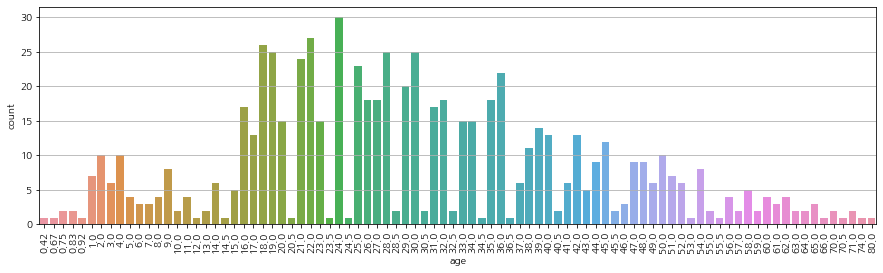

In [7]:
# 연령별 승선인원 카운트해서 시각화
plt.figure(figsize=(15,4))
sns.countplot(data=titanic, x='age')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()
# 나이가 소수점인 데이터는 문제가 있어보인다.

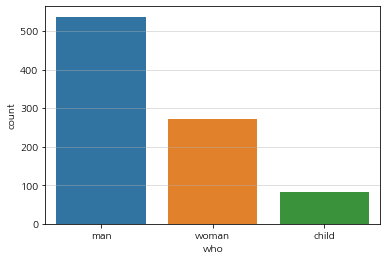

In [12]:
# 남자/여자/어린이 승선인원 시각화
sns.countplot(data=titanic,x='who')
plt.grid(axis='y', alpha=0.5)
plt.show()

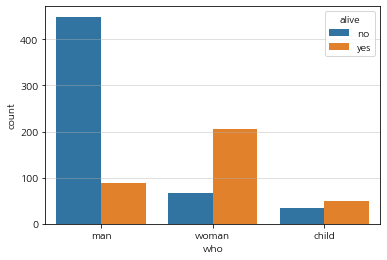

In [13]:
# 남자/여자/어린이 승선인원별 생존여부 시각화
sns.countplot(data=titanic,x='who', hue='alive')
plt.grid(axis='y', alpha=0.5)
plt.show()

## 3. 러그플롯
* sns.rugplot(data=데이터프레임, x=컬럼)
* 데이터의 위치를 보여준다.

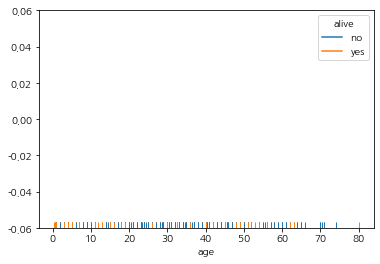

In [15]:
sns.rugplot(data=titanic, x='age', hue='alive')

## 4. 히스토그램
* sns.displot(data=데이터프레임, x=컬럼)

In [17]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


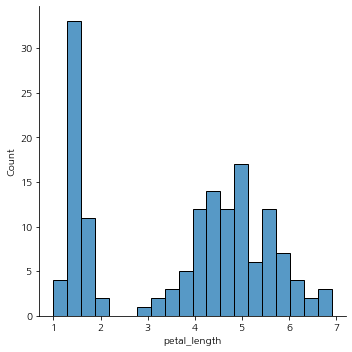

In [19]:
sns.displot(data=iris, x='petal_length', bins=20)

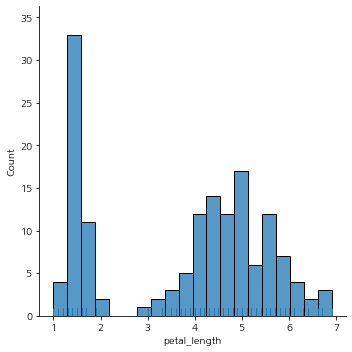

In [20]:
# 러그 표시하기
sns.displot(data=iris, x='petal_length', bins=20, rug=True)
plt.show()

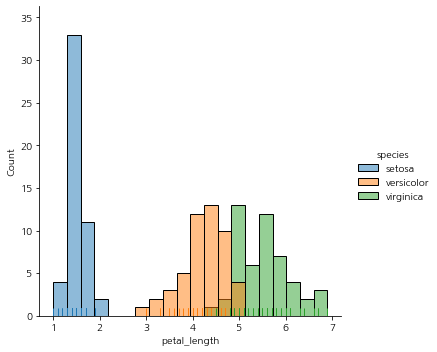

In [39]:
# 품종별로 비교하기
sns.displot(data=iris, x='petal_length', bins=20, rug=True, 
            hue='species')
plt.show()

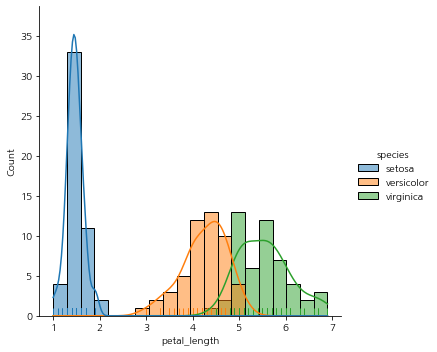

In [24]:
# 곡선 표시하기
sns.displot(data=iris, x='petal_length', bins=20, rug=True, 
            hue='species', kde=True)
plt.show()

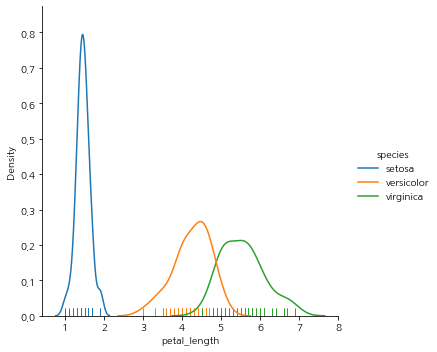

In [27]:
# 곡선만 표시하기
sns.displot(data=iris, x='petal_length',rug=True, 
            hue='species', kind='kde')
plt.show()

## 5. 상자수염그래프, 바이올린플롯, 스트립플롯, 스웜플롯
* sns.boxplot(data=데이터프레임)
* sns.violinplot(data=데이터프레임)
* sns.stripplot(data=데이터프레임)
* sns.swarmplot(data=데이터프레임)

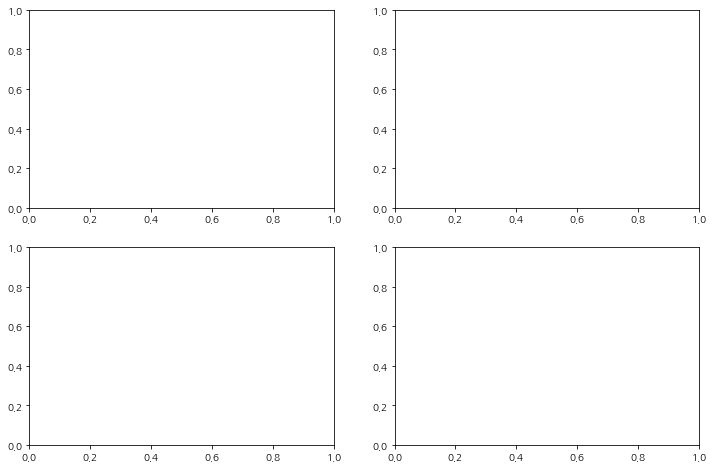

In [28]:
# 동시에 비교하기 위해 서브플롯 4개 생성

plt.figure(figsize=(12,8))
plt.subplot(221)
plt.subplot(222)
plt.subplot(223)
plt.subplot(224)

plt.show()

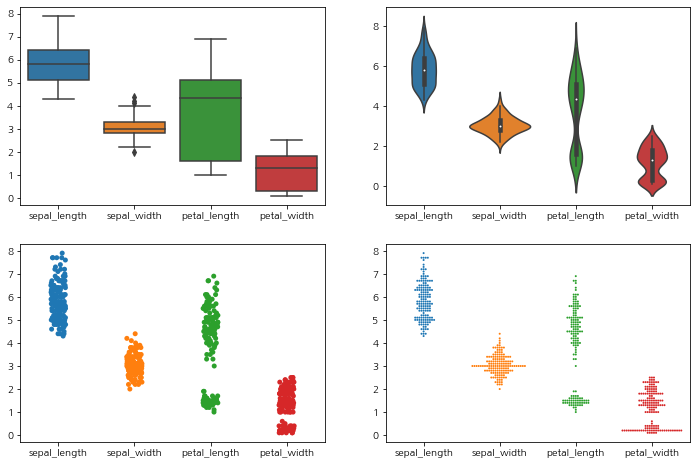

In [33]:
# 그래프 그려주기
plt.figure(figsize=(12,8))

# 박스플롯
plt.subplot(221)
sns.boxplot(data=iris) # 숫자로된 데이터로만 그려준다.
# 데이터의 통계값을 알기 쉽다.

# 바이올린플롯
plt.subplot(222)
sns.violinplot(data=iris)
# 데이터의 분포 밀집정도를 알기 쉽다.

# 스트립플롯
plt.subplot(223)
sns.stripplot(data=iris)
# 데이터의 분포 밀집정도를 알기 쉽다.
# 점이 겹쳐져 있는 것을 보완한 것이 스웜플롯

# 스웜플롯
plt.subplot(224)
sns.swarmplot(data=iris, s=2)
# 점의 크기가 너무 크면 경고메세지
# 끊어진 부분은 데이터가 없다고 알 수 있다.

plt.show()

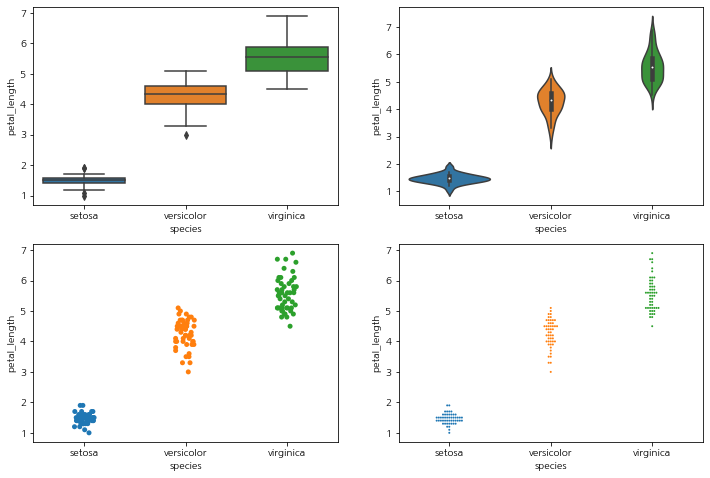

In [38]:
# 품종별 petal_length 그래프 그려주기
plt.figure(figsize=(12,8))

# 박스플롯
plt.subplot(221)
sns.boxplot(data=iris, x='species', y='petal_length')

# 바이올린플롯
plt.subplot(222)
sns.violinplot(data=iris, x='species', y='petal_length')

# 스트립플롯
plt.subplot(223)
sns.stripplot(data=iris, x='species', y='petal_length')

# 스웜플롯
plt.subplot(224)
sns.swarmplot(data=iris, x='species', y='petal_length', s=2)
# 바이올린 플롯과 모양이 비슷

plt.show()

# 서울시 연간 기온변화 분석 및 시각화
기상자료개방포털에서 데이터를 수집하여 전처리하고, 서울시 연간 기온 변화를 분석하고 시각화 할 수 있다.

## 1. 전국 기온데이터 수집
* 기상자료개방포털
    https://data.kma.go.kr/cmmn/main.do

* 기상자료개방포털>데이터>기상관측>지상>종관기상관측

    [자료형태] 일자료

    [지점] 전체

    [자료] 기온>최저,최고,평균

    [기간] 1911~2010(10년단위로 나눠 다운로드)
